# Credit Card Fraud Detection 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


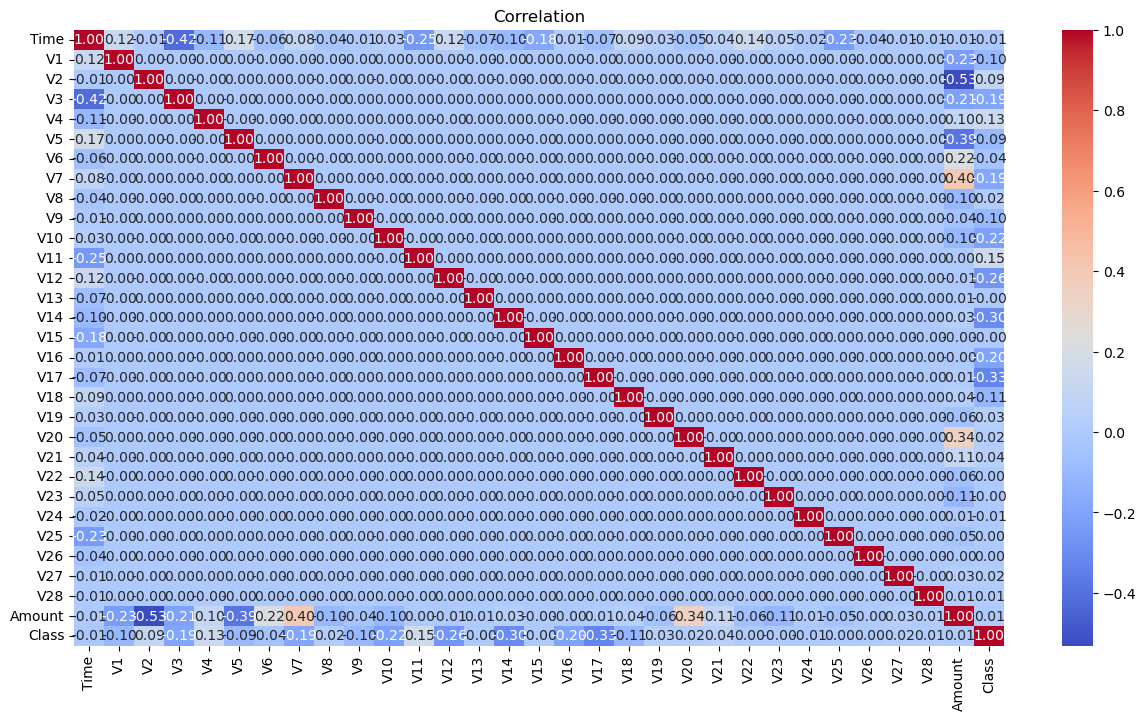

In [5]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation")
plt.show()

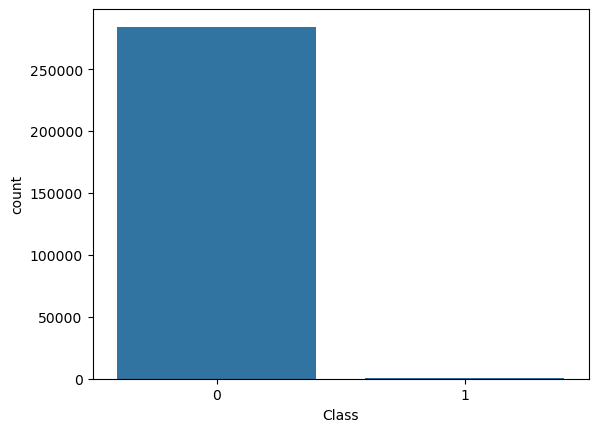

In [6]:
sns.countplot( x = df['Class'])
plt.show()

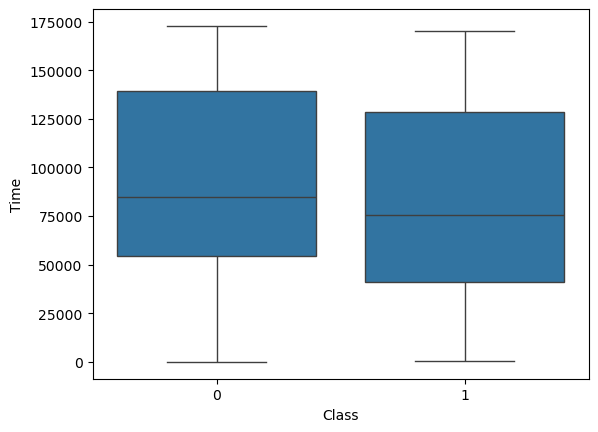

In [7]:
sns.boxplot(x = df['Class'], y=df['Time'])
plt.show()

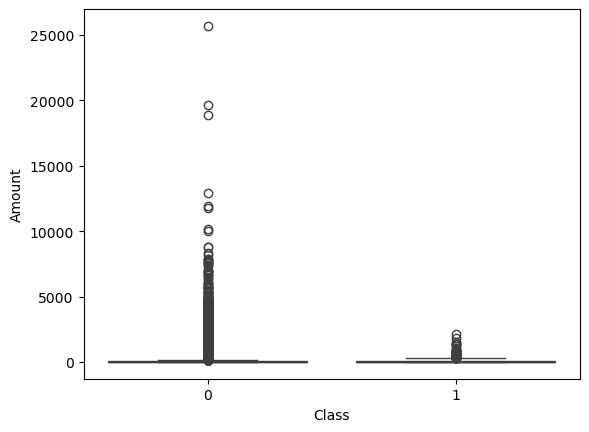

In [8]:
sns.boxplot(x= df['Class'], y=df['Amount'])
plt.show()

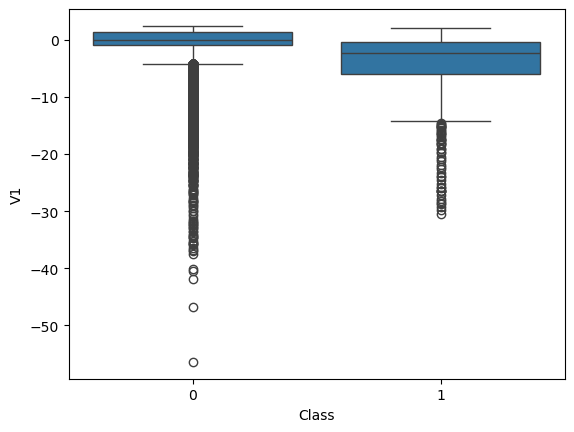

In [9]:
sns.boxplot(x= df['Class'], y=df['V1'])
plt.show()

In [10]:
X = df.drop('Class', axis=1)  # Features
Y = df['Class']

In [11]:
# from imblearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('smote', SMOTE()),
#     ()
# ])

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [13]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_res, y_res = sm.fit_resample(x_scaled, Y)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)



In [16]:
print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.989413659283508


In [17]:
print('Classification report:', classification_report(y_test, y_pred))

Classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99     56757
           1       1.00      0.98      0.99     56880

    accuracy                           0.99    113637
   macro avg       0.99      0.99      0.99    113637
weighted avg       0.99      0.99      0.99    113637



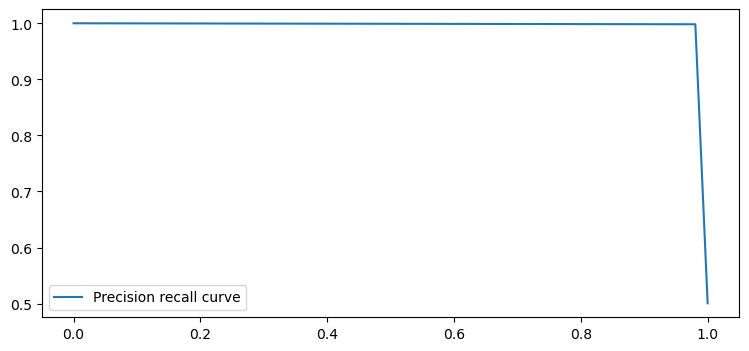

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(9,4))
plt.plot(recall, precision, label='Precision recall curve')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score

print('ROC_auc_score',roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

ROC_auc_score 0.9995362236154344


In [20]:
train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1])
test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

print("Train AUC score", train_auc)
print("Test AUC score", test_auc)

Train AUC score 0.9996081514543804
Test AUC score 0.9995362236154344


In [21]:
df_new = df.copy()

In [23]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100,200],
    'classifier__max_depth': [10,20, None],
}

cv =StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)

grid_search.fit(X,Y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END classifier__max_depth=10, classifier__n_estimators=100; total time= 9.0min
[CV] END classifier__max_depth=20, classifier__n_estimators=100; total time=11.5min
[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time=11.6min
[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time=11.6min
[CV] END classifier__max_depth=20, classifier__n_estimators=100; total time=11.8min
[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time=11.9min
[CV] END classifier__max_depth=20, classifier__n_estimators=100; total time=11.5min
[CV] END classifier__max_depth=10, classifier__n_estimators=200; total time=15.1min
[CV] END classifier__max_depth=10, classifier__n_estimators=200; total time=15.0min
[CV] END classifier__max_depth=10, classifier__n_estimators=200; total time=15.5min
[CV] END classifier__max_depth=20, classifier__n_estimators=200; total time=18.9min
[CV] END c

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [24]:
print("Best parameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)

Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best AUC score: 0.9848718294068203


In [27]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(X,Y, test_size=0.2, random_state=42)

best_model = grid_search.best_estimator_

best_model.fit(x_train_,y_train_)
y_pred_ = best_model.predict(x_test_)

In [30]:
print('Accuracy score:', accuracy_score(y_test_, y_pred_))
print('Classification report:', classification_report(y_test_, y_pred_))
print('roc auc score:', roc_auc_score(y_test_, best_model.predict_proba(x_test_)[:,1]))

Accuracy score: 0.9976299989466662
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.89      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.94      0.78     56962
weighted avg       1.00      1.00      1.00     56962

roc auc score: 0.9874058620353037


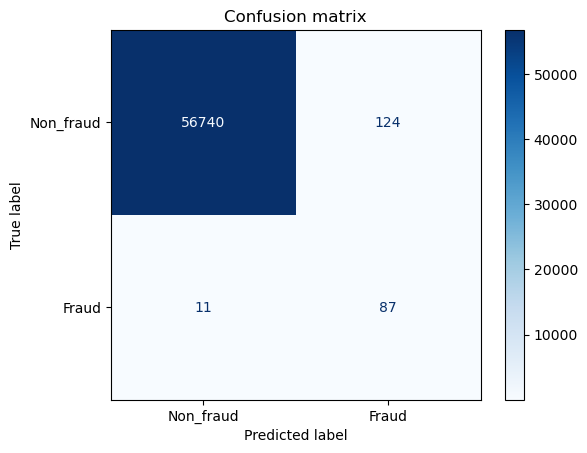

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_, y_pred_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non_fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion matrix')
plt.show()

In [34]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### *If you find any errors or have suggestions to improve this prediction, feel free to DM me. Thank you!*